In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OrdinalEncoder,RobustScaler
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns

In [ ]:
df=pd.read_csv("/content/adult.csv")
df.head(4)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


<Axes: >

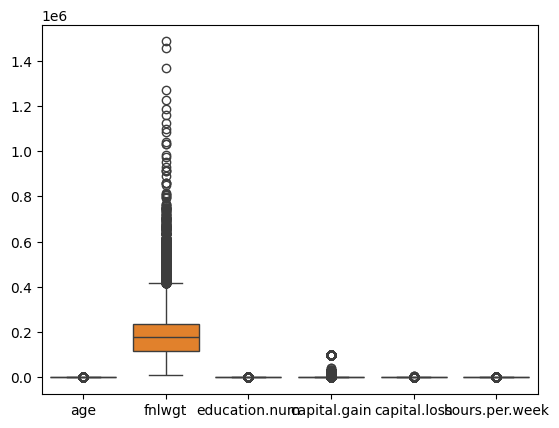

In [ ]:
sns.boxplot(df)

In [ ]:
df.replace('?', 'nan', inplace=True)

In [ ]:
x=df.drop('income',axis=1)
y=df['income'].apply(lambda n: 1 if n == '>50K' else 0)

In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,train_size=0.8,random_state=42)

In [ ]:
num_col=xtrain.select_dtypes(include='number').columns
cat_col=xtrain.select_dtypes(exclude='number').columns

In [ ]:
for i in cat_col:
   print(f"{i}: {df[i].nunique()}")

workclass: 9
education: 16
marital.status: 7
occupation: 15
relationship: 6
race: 5
sex: 2
native.country: 42


In [ ]:
preprocessing=ColumnTransformer(
    transformers=[
        ('scaler',RobustScaler(),num_col),
        ('encoder',OrdinalEncoder(handle_unknown='use_encoded_value',unknown_value=-1),cat_col)
    ]
)

In [ ]:
svcpipeline=Pipeline(
    steps=[
        ('preprocessing',preprocessing),
        ('model',SVC(C=0.1,kernel='poly',gamma=0.1))
    ]
)
svcpipeline.fit(xtrain,ytrain)

In [ ]:
print("Train_score:",svcpipeline.score(xtrain,ytrain))
print("Test_score:",svcpipeline.score(xtest,ytest))

* Train_score: 0.7630528255528255
* Test_score: 0.7681559957009059


In [ ]:
grid_search_cv=GridSearchCV(
    estimator=svcpipeline,
    param_grid={'model__C':[0.01,0.1,1.0,10],
                'model__class_weight':['balanced',None],
                'model__kernel':['linear','rbf','poly','sigmoid'],
                'model__gamma':[0.01,0.1,1.0,10],
    },
    cv=3,
    n_jobs=-1,
    verbose=1,
    scoring='f1_macro'
)
grid_search_cv.fit(xtrain,ytrain)

Fitting 3 folds for each of 128 candidates, totalling 384 fits


KeyboardInterrupt: 

In [ ]:
print("Train_score:",grid_search_cv.score(xtrain,ytrain))
print("Test_score:",grid_search_cv.score(xtest,ytest))

In [ ]:
grid_search_cv.best_params_

In [ ]:
model=grid_search_cv.best_estimator_

In [ ]:
model.fit(xtrain,ytrain)

In [ ]:
model.score(xtrain,ytrain)

In [ ]:
grid_search_cv.best_score_

In [ ]:
y_pred=model.predict(xtest)

In [ ]:
print("Accuracy:", accuracy_score(ytest, y_pred))
print("Confusion Matrix:\n", confusion_matrix(ytest, y_pred))
print("Classification Report:\n", classification_report(ytest, y_pred))